# Introdução

Nesse cardeno será utilizado para o estudo de probabilidades, focando nas vários modelos, como eles variam dependendo de seus parâmetros, suas aplicações e como eles se relacionam com outros modelos de probabilidade. Será uma análise bastante empírica com ênfase no estudo de importantes modelos de probabilidade tendo em vista sua aplicação para modelagem de cenários reais.

A construação desse notebook será realizado com base no estudo de:
  1. cursos do DataCamp sobre probabilidade Statisticals Fundamentals with Python
  2. Livro de estatística básica do Bussub e Moritini
  3. Livro de probabilidade do Ross
  4. cursos de estatística e probabilidade da Udemy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [12]:
iris = sns.load_dataset('iris')
sns.set()

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Análise exploratória de dados

## Histograma

O histograma é a forma mais direta de vermos a distribuição de uma variável. Ela agrega os registros em intervalos de dados e expõe a contagem de observações dentro de cada um dos intervalos. É uma forma bem prática e eficiente de termos uma primeira visão sobre os dados.

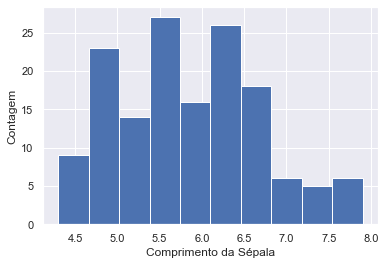

In [15]:
plt.hist(iris['sepal_length'])
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Contagem')
plt.show()

Podemos ccustomizar o histograma definindo a quantidade de intervalos (bins). Uma regra de bolso bastante utilizada é definir a quantidade de bins como sendo o inteiro equivalente à raiz quadrada da quantidade de observações. Essa fórmula parece funcionar enquanto a quantidade de registros é intermediária. Porém, conforme a quantidade de observações aumenta para valores maiores, essa regra fragmenta demais o gráfico. 

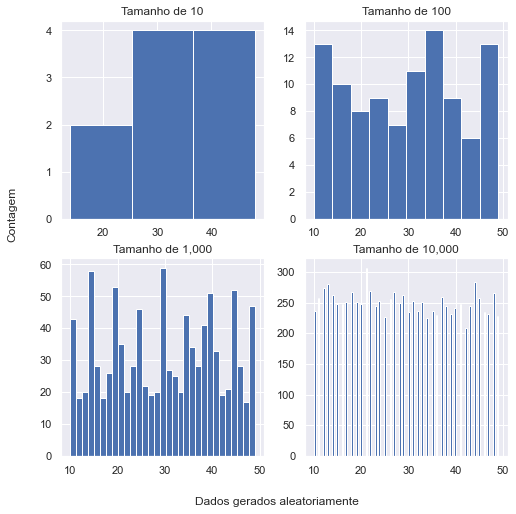

In [17]:
n_data_list = [10, 100, 1000, 10000]
fig = plt.figure(figsize=(8,8))


for i, n_data in enumerate(n_data_list):
    data = np.random.randint(10, 50, n_data)
    n_bins = int(np.sqrt(n_data))
    
    plt.subplot(2, 2, i+1)
    plt.hist(data, bins=n_bins)
    plt.title(f'Tamanho de {n_data:,}')

    
fig.text(0.5, 0.04, 'Dados gerados aleatoriamente', ha='center')
fig.text(0.04, 0.5, 'Contagem', ha='center', rotation='vertical')
plt.show()

## Bee swarm

É uma técnica gráfica que nos permite analisar a distribuição de forma mais desagregada. Porém por ser uma análise mais desagregada, ela é útil para casos em que a quantidade de dados não é tão grande. Nesses casos podemos recorrer ao histograma ou então extrair uma amostra dos nossos dados, visto que uma amostra aleatória, se grande o suficiente, será representativa da distribuição da população.

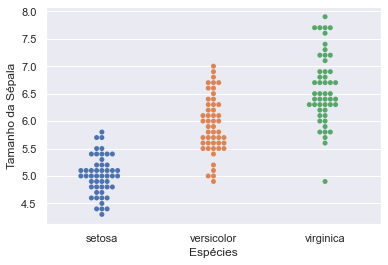

In [27]:
sns.swarmplot(x='species', y='sepal_length', data=iris)
plt.xlabel('Espécies')
plt.ylabel('Tamanho da Sépala')
plt.show()

C:\Users\leona\miniconda3\envs\stats_study\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


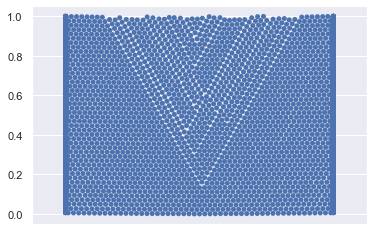

In [34]:
sns.swarmplot(y=np.random.rand(10000))
plt.show()

In [22]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    
    return x, y

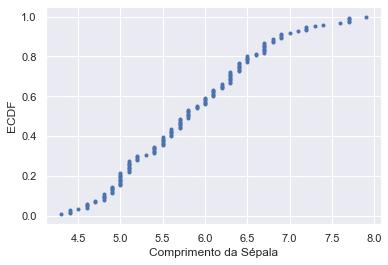

In [41]:
x, y = ecdf(iris['sepal_length'])
plt.plot(x_len, y_len, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Comprimento da Sépala')
plt.show()

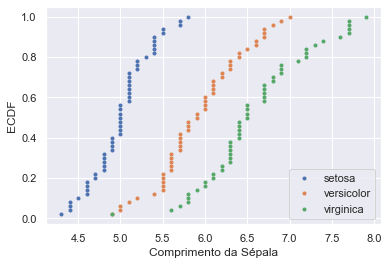

In [51]:
species_list = iris['species'].unique() 
for specie in species_list:
    data = iris.loc[iris['species'] == specie, 'sepal_length']
    x, y = ecdf(data)
    plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('Comprimento da Sépala')
plt.ylabel('ECDF')
plt.legend(species_list, loc='lower right')
plt.show()  

## Estatísticas descritivas

Tendência central:
  - média (é impactada por outliers)
  - mediana (robusta quanto a outliers)
  - moda
  
Dispersão:
  - quantils
  - desvio padrão
  - variância

In [65]:
data = iris['sepal_length']
percentiles = np.array([25, 50, 75])
quartils = np.percentile(data, percentiles)
quartils

array([5.1, 5.8, 6.4])

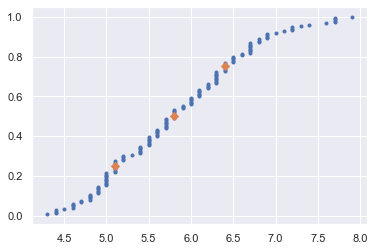

In [66]:
x, y = ecdf(data)
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(quartils, percentiles/100, marker='D', linestyle='none')
plt.show()

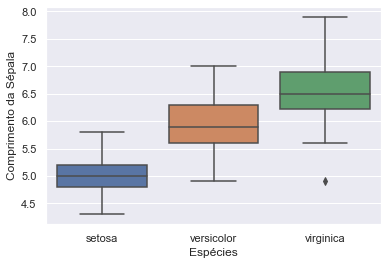

In [68]:
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.xlabel('Espécies')
plt.ylabel('Comprimento da Sépala')
plt.show()

# Associação entre duas variáveis

Associação entre largura e comprimento da pétala
	Covariância: 1.30
	Correlação:  0.96



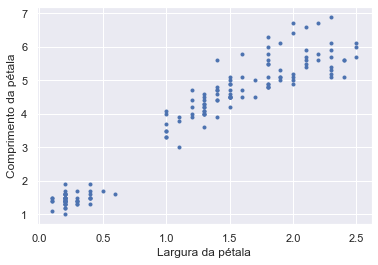

In [94]:
x = iris['petal_width']
y = iris['petal_length']

cov = np.cov(x, y)[0, 1]
r = np.corrcoef(x, y)[0, 1]
print('Associação entre largura e comprimento da pétala')
print(f'\tCovariância: {cov:.2f}')
print(f'\tCorrelação:  {r:.2f}')
print()

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Largura da pétala')
plt.ylabel('Comprimento da pétala')
plt.show()

# Probabilidade

Permite descrever incerteza e também extrapolar os resultados a partir dos dados coletados. Considerando que a cada coleta de dados podemos ter informações distintas (uma amostra nunca será equivalente à outra e quase nunca conseguimos medir a nossa população). A probabilidade pode nos dar uma medida de incerteza quanto às nossas conclusões. Através da estatística, mesmo que nossa amostra seja diferente podemos garantir que nossas estimativas não o sejam (estimativas robustas).

## Distribuição de probabilidade discreta

PMF - probobility mass funcion - é igual ao histograma da distribuição que evidencia a probabilidade de cada valor ocorrer
  - Uniforme
  - Bernoulli
  - Binomial
  - Hipergeométrica
  - Poisson

### Uniforme

Na distribuição de probabilidade uniforme todos os valores possíveis ocorrem com a mesma probabilidade.

$P(X=x_{i})=p(x_{i})=p= {\frac {1} {k}} $

$E(X) = {\frac {1} {k}} \sum_{i=1}^{k}{x_i}$

$Var(X) = \frac {1} {k}$

$F(x) =\sum_{x_i \le x} {\frac{1}{k}} $

In [23]:
u = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
uniform_sample = np.random.choice(u, size=10000)

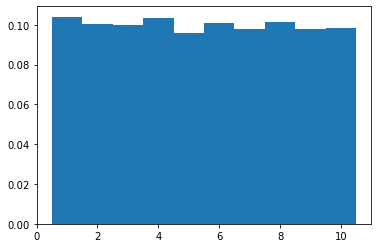

In [30]:
bins = np.arange(min(uniform_sample), max(uniform_sample) + 1.5) - 0.5
plt.hist(uniform_sample, density=True, bins=bins)
plt.show()

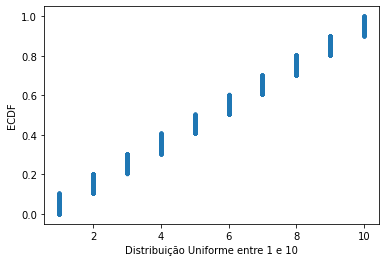

In [27]:
x, y = ecdf(uniform_sample)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Distribuição Uniforme entre 1 e 10')
plt.ylabel('ECDF')
plt.show()

### Distribuição de Bernoulli

É tipo um cara ou coroa

### Distribuição Binomial

Sequencia de ensaios de Bernoulli independentens

### Distribuição Hipergeométrica

Extração sem reposição, como se fosse uma Binomial onde os ensaios de Bernoulli não são independentes.

### Distribuição de Poisson

Aproximação da Binomial quando a quantidade de ensaios de Bernoulli é muito grande e a probabilidade de ocorrência do evento é baixa

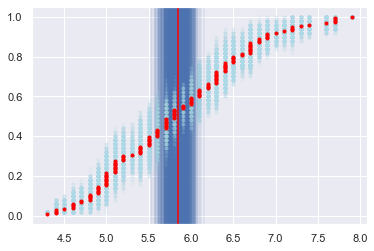

In [129]:
sepal_len = iris['sepal_length']
n_samples = 1000
sample_size = 50
for _ in range(n_samples):
    sample = sepal_len.sample(sample_size)
    x, y = ecdf(sample)
    plt.plot(x, y, marker='.', linestyle='none',color='lightblue', alpha=0.1)
    mean = np.mean(sample)
    plt.axvline(mean, alpha=0.1)

x, y = ecdf(sepal_len)
plt.plot(x, y, marker='.', linestyle='none', color='red')
mean = np.mean(sepal_len)
plt.axvline(mean, color='red')
plt.show()

Podemos utilizar o módulo random do numpy para simular experimentos estatísticos (hacker statistics).

Um experimento de Bernoulli pode ser gerado utilizando o método random. O experimento de Bernoulli é quando temos um evento binário com uma probabilidade fixa de ocorrência, como por exemplo, um cara ou coroa.

**Valor esperado?**

**Variância?**

In [202]:
def bernoulli(p, n=1):
    return np.random.random(size=n) <= p


def binomial(n, p):
    bernoulli_results = bernoulli(p, n=n)
    return np.sum(bernoulli_results)

In [211]:
sample_size = 100
n=10000
p=0.01
x_measure = f'Quantidade de defaults em {n:,} empréstimos'

binomial_sample = [binomial(n, p) for _ in range(sample_size)]

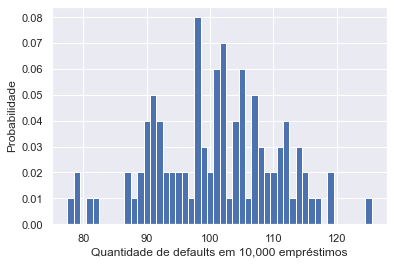

In [212]:
bins = np.arange(min(binomial_sample), max(binomial_sample) + 1.5) - 0.5
plt.hist(binomial_sample, density=True, bins=bins)
plt.xlabel(x_measure)
plt.ylabel('Probabilidade')
plt.show()

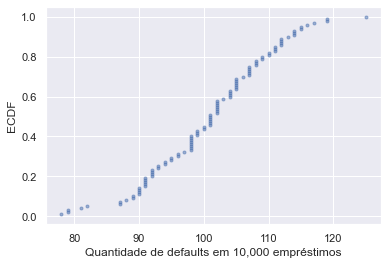

In [213]:
x, y = ecdf(binomial_sample)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.5)
plt.xlabel(x_measure)
plt.ylabel('ECDF')
plt.show()

Qunado o n é muito grande e o p é muito pequeno a distribuição binomial converge para uma distribuição Poisson. A grande vantagem da distribuição de Poisson é que ela depende apenas de sua média, n * p.

In [197]:
mean = 10
sample_size = 10000
sample_poisson = np.random.poisson(mean, sample_size)
print(f'Poisson: {np.mean(sample_poisson)}, {np.std(sample_poisson)}', '\n')

binomials_probabilities = [.5, .1, .01]
for p in binomials_probabilities:
    n = int(mean / p)
    sample_binomial = np.random.binomial(n, p, sample_size)
    print(f'n={n:,} Binom: {np.mean(sample_binomial)}, {np.std(sample_binomial)}')

Poisson: 9.9973, 3.124786826329118 

n=20 Binom: 10.0153, 2.2312924304088875
n=100 Binom: 10.0129, 2.974984636935122
n=1,000 Binom: 10.0212, 3.148706172382555


# Distribuições de probabilidade contínuas

Enquanto cada ponto de uma PMF mede a probabilidade de cada ponto, a PDF mede a probabilidade através da área de um intervalo de valores. Isso decorre do fato de que em distribuições contínuas a proabilidade de ocorrência de um valor é igual à 0.

Comparar histograma ao PDF gera viés por conta dos bins. Então, é melhor comparar o ECDF ao CDF teórico. 

  - Normal

In [244]:
import sklearn.datasets as dataset
boston = dataset.load_boston()

boston_df = pd.DataFrame(boston['data'])
boston_df.columns = boston['feature_names']
boston_df['PRICE'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


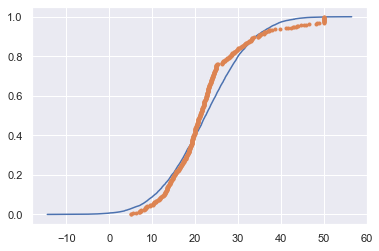

In [251]:
price_mean = boston_df['PRICE'].mean()
price_std = boston_df['PRICE'].std()

theor_sample = np.random.normal(price_mean, price_std, size=10000)
x, y = ecdf(boston_df['PRICE'])
x_theor, y_theor = ecdf(theor_sample)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

In [226]:
np.random.normal(10)

10.117847443773037